In [7]:
import math
import pandas_datareader as web
from main_funcs import get_and_update_data
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
from binance.enums import HistoricalKlinesType

plt.style.use('fivethirtyeight')

In [8]:
df = get_and_update_data("BTCUSDT", "4h", HistoricalKlinesType.SPOT, "Netherlands")
df = df[["open", "high", "low", "close","volume" ]]
df
# df = web.DataReader('AAPL',data_source="yahoo",start="2012-01-01",end="2019-12-17")
# df

Start Time: 2023-11-08T08:00:00.100000000
IP from 'Netherlands' . its OK!
start get data from binance: 2023-11-08 16:30:00.670052
Getting Data ...
finish get data from binance: 2023-11-08 16:30:01.583295
0 radif data gerefte shod az binance
etelaat jadidi mojod nist


,open,high,low,close,volume
open_time,,,,,
2017-08-17 07:30:00,4261.48,4349.99,4261.32,4349.99,82.088865
2017-08-17 11:30:00,4333.32,4485.39,4333.32,4427.30,63.619882
2017-08-17 15:30:00,4436.06,4485.39,4333.42,4352.34,174.562001
2017-08-17 19:30:00,4352.33,4354.84,4200.74,4325.23,225.109716
2017-08-17 23:30:00,4307.56,4369.69,4258.56,4285.08,249.769913
...,...,...,...,...,...
2023-11-07 19:30:00,34721.23,35579.70,34560.00,35453.98,12011.043930
2023-11-07 23:30:00,35453.98,35888.00,35200.18,35399.12,9841.056310
2023-11-08 03:30:00,35399.13,35419.29,35231.08,35269.68,2888.444780


In [9]:
# Get the number of rows and columns in the data set
df.shape

(13630, 5)

AttributeError: 'int' object has no attribute 'items'

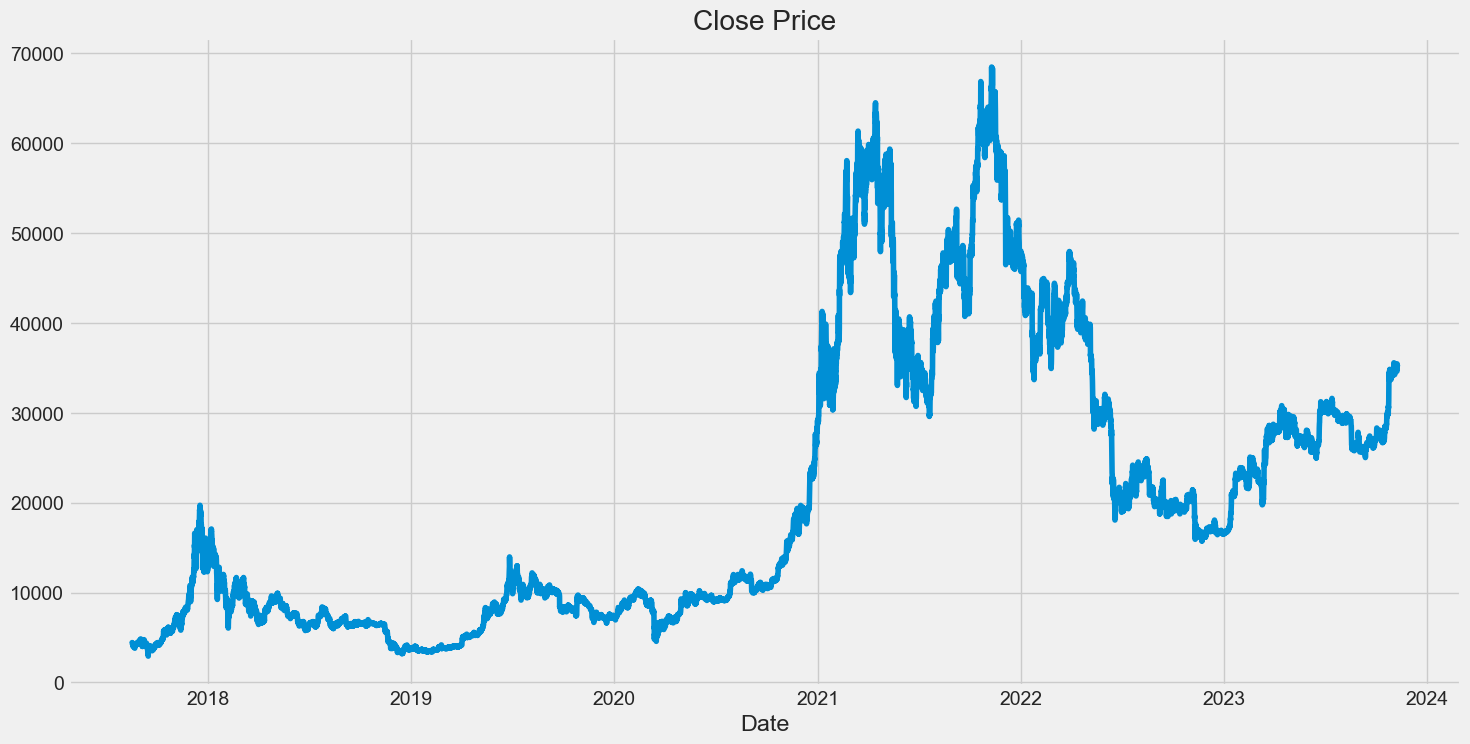

In [10]:
# Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price')
plt.plot(df.close)
plt.xlabel('Date',fontdict=18)
plt.ylabel('Close Price', fontdict=18)

<Axes: xlabel='open_time'>

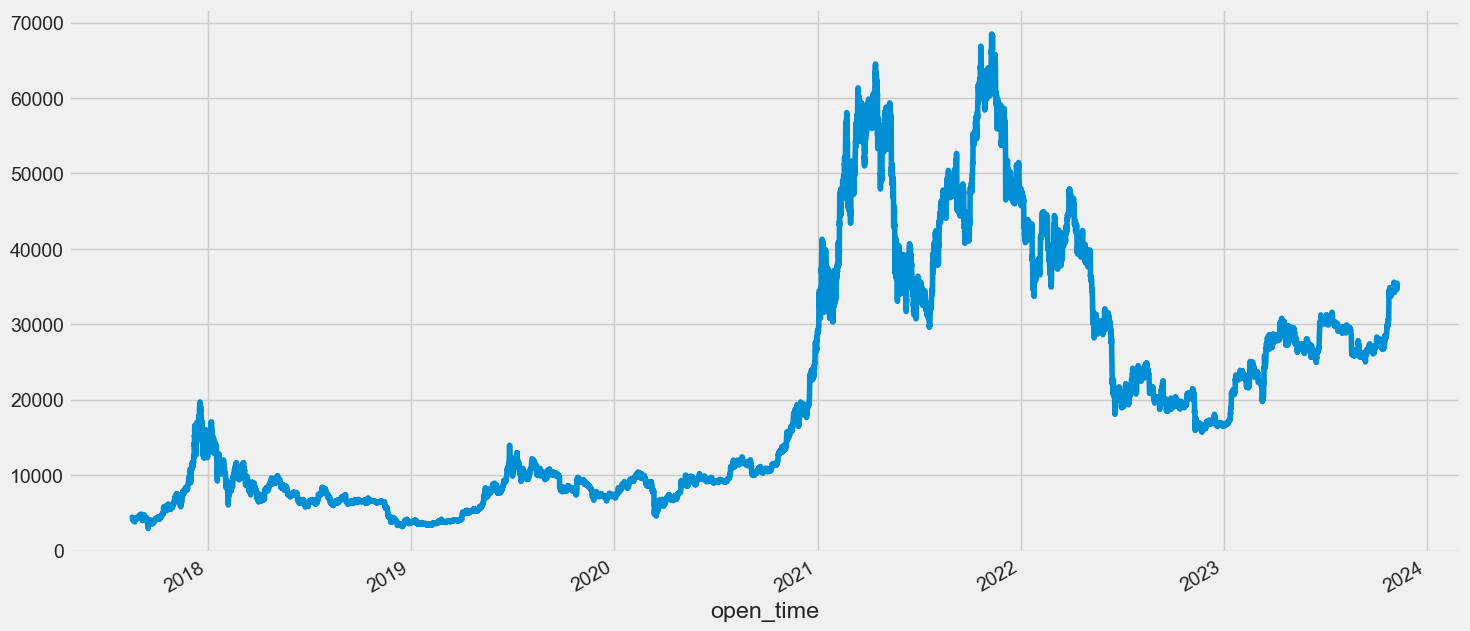

In [11]:
df['close'].plot(figsize=(16,8))

In [22]:
# Create a new dataframe with only close column
data = df.filter(['close'])
# Conver the dataframe to a numpy array
dataset = data.values
#get the number of rows to train the model on
trainiing_data_len = math.ceil(len(dataset) * 0.8)
trainiing_data_len

10904

In [29]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print(scaled_data)

[[0.02182352]
 [0.02300255]
 [0.02185936]
 ...
 [0.49336871]
 [0.49270867]
 [0.49430068]]


In [33]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:trainiing_data_len, :]
# Split the data into x_train and y_train data set
x_train = []
y_train = []
range_number = 60
for i in range(range_number,len(train_data)):
    x_train.append(train_data[i-range_number:i,0])
    y_train.append(train_data[i,0])
    if i <= range_number+1:
        print(x_train)
        print(y_train)
        print()


[array([0.02182352, 0.02300255, 0.02185936, 0.02144591, 0.0208336 ,
       0.02094508, 0.02106495, 0.02167589, 0.02009867, 0.0185643 ,
       0.01813866, 0.01859892, 0.01699639, 0.01583932, 0.01605969,
       0.01764683, 0.01862073, 0.01792896, 0.01886306, 0.0181106 ,
       0.01839228, 0.0189962 , 0.01780192, 0.01777859, 0.01715133,
       0.01683839, 0.01682146, 0.01689848, 0.01672996, 0.01438731,
       0.01340654, 0.01444968, 0.01432386, 0.0162456 , 0.01709597,
       0.01801726, 0.01762791, 0.02011545, 0.01949109, 0.01827134,
       0.01822467, 0.01821811, 0.01882418, 0.01956658, 0.01987159,
       0.01978115, 0.0213053 , 0.02125467, 0.02150341, 0.02199555,
       0.02250019, 0.02117049, 0.0207665 , 0.02102972, 0.02136158,
       0.02088911, 0.02067987, 0.02096232, 0.02163212, 0.02128853])]
[0.02127220875081972]

[array([0.02182352, 0.02300255, 0.02185936, 0.02144591, 0.0208336 ,
       0.02094508, 0.02106495, 0.02167589, 0.02009867, 0.0185643 ,
       0.01813866, 0.01859892, 0.01